### Import Necessary Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

### Read the datasets


In [3]:
# Read Train and Test dataset
data_train = pd.read_csv("KDDTrain+.txt")
data_test = pd.read_csv("KDDTest+.txt")

In [4]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [5]:
data_train.columns = columns
data_train = data_train.drop('level', axis=1)

In [6]:
data_test.columns = columns
data_test = data_test.drop('level', axis=1)

### Train Dataset

In [9]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [14]:
nmap_data = data_train[data_train['outcome'] == 'satan']
print(nmap_data.iloc[2])

duration                           0
protocol_type                    udp
service                        other
flag                              SF
src_bytes                          1
dst_bytes                          0
land                               0
wrong_fragment                     0
urgent                             0
hot                                0
num_failed_logins                  0
logged_in                          0
num_compromised                    0
root_shell                         0
su_attempted                       0
num_root                           0
num_file_creations                 0
num_shells                         0
num_access_files                   0
num_outbound_cmds                  0
is_host_login                      0
is_guest_login                     0
count                             22
srv_count                          6
serror_rate                      0.0
srv_serror_rate                  0.0
rerror_rate                      0.0
s

In [7]:
second_line = data_train.iloc[1]
print(second_line)


duration                             0
protocol_type                      tcp
service                        private
flag                                S0
src_bytes                            0
dst_bytes                            0
land                                 0
wrong_fragment                       0
urgent                               0
hot                                  0
num_failed_logins                    0
logged_in                            0
num_compromised                      0
root_shell                           0
su_attempted                         0
num_root                             0
num_file_creations                   0
num_shells                           0
num_access_files                     0
num_outbound_cmds                    0
is_host_login                        0
is_guest_login                       0
count                              123
srv_count                            6
serror_rate                        1.0
srv_serror_rate          

In [8]:
data_train.describe().style.background_gradient(cmap='RdPu').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241
std,2604.525522,5870354.480802,4021285.112110,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Test Dataset

In [9]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [10]:
data_test.describe().style.background_gradient(cmap='RdPu').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,10395.911369,2056.110012,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,0.002440,0.000266,0.114670,0.008739,0.001153,0.003549,0.000000,0.000488,0.028435,79.021692,31.125316,0.102928,0.103640,0.238429,0.235145,0.740376,0.094075,0.098115,193.866699,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649
std,1407.207069,472796.912692,21219.763847,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,0.049335,0.021061,8.041792,0.676857,0.048015,0.067831,0.000000,0.022085,0.166214,128.538218,89.064396,0.295373,0.298337,0.416096,0.416193,0.412479,0.259143,0.253550,94.036867,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,54.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,287.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000,16.000000,0.000000,0.000000,0.250000,0.070000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,62825648.000000,1345927.000000,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Label Distribution of Training and Test set

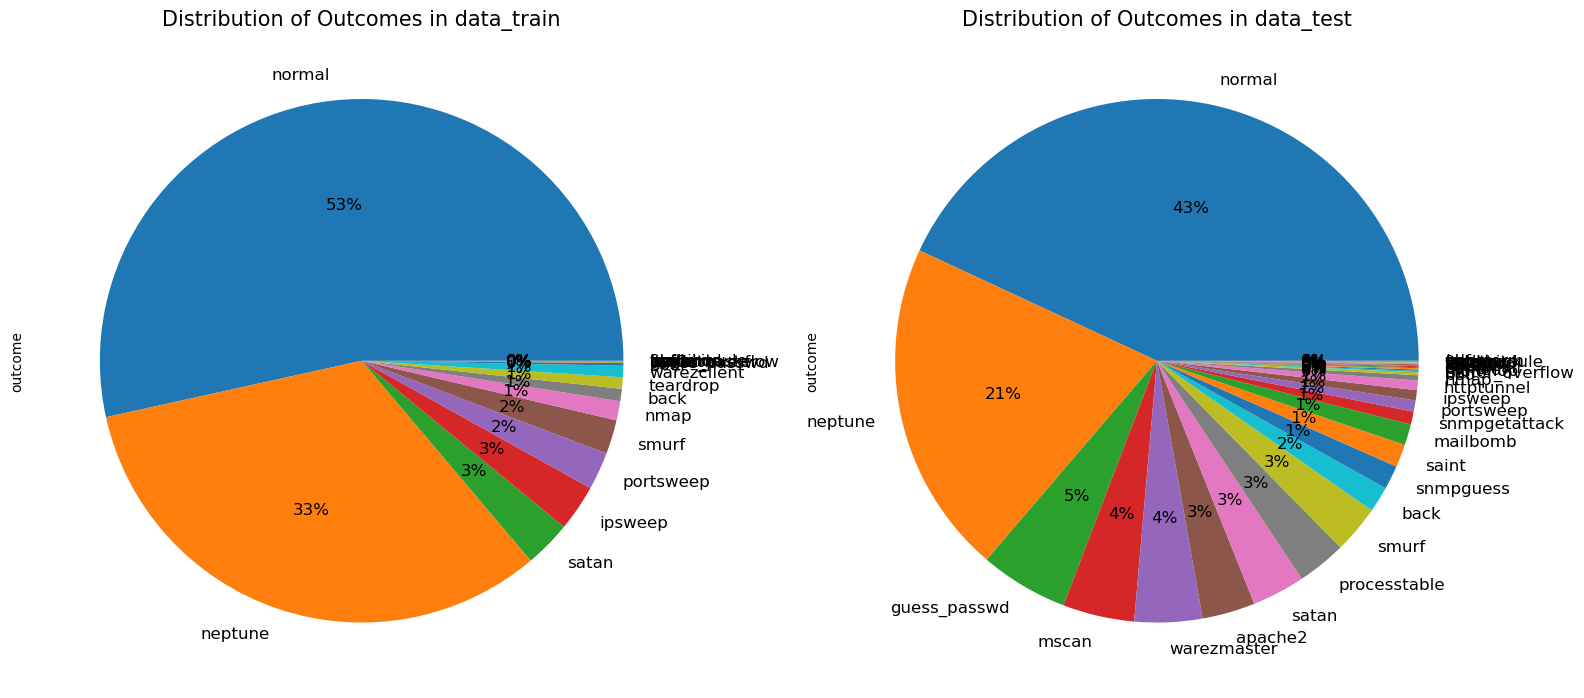

In [11]:
def pie_plot(df, col, title, position):
    plt.subplot(position)
    df[col].value_counts().plot(kind='pie', autopct='%1.0f%%', fontsize=12)
    plt.title(title, fontsize=15)

# Create a figure with two subplots side by side
plt.figure(figsize=(16, 8))

# Call the function for the 'outcome' column in data_train
pie_plot(data_train, 'outcome', 'Distribution of Outcomes in data_train', 121)

# Call the function for the 'outcome' column in data_test
pie_plot(data_test, 'outcome', 'Distribution of Outcomes in data_test', 122)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


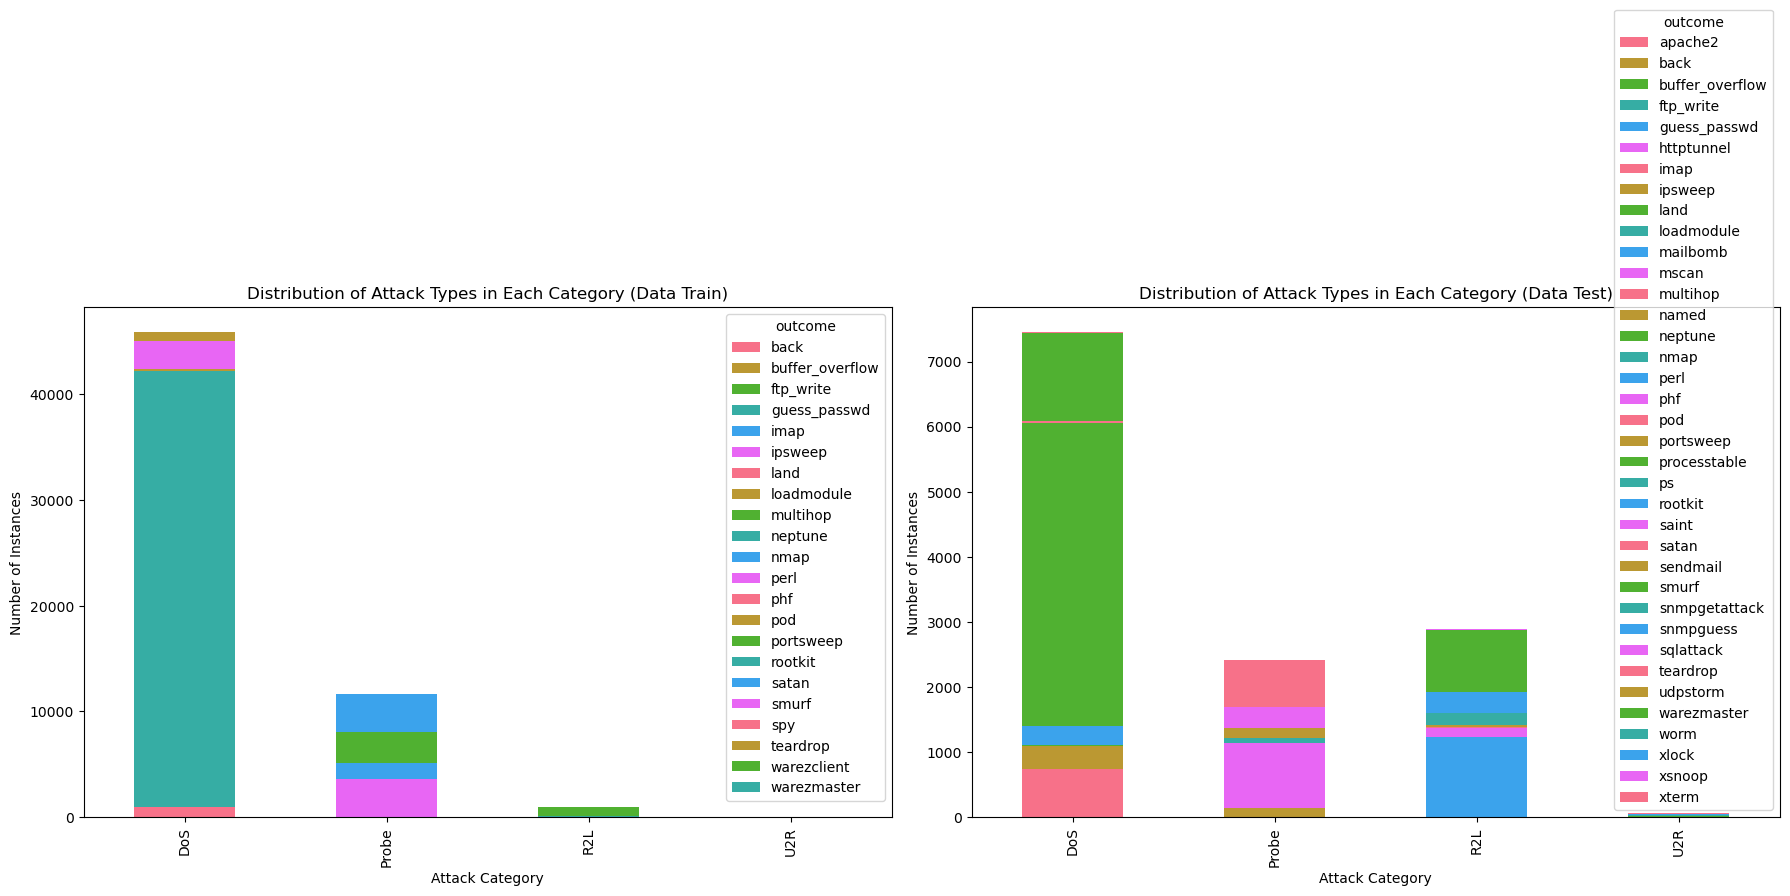

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Attack_Type' is the column representing attack types
attack_mapping = {
    'DoS': ['neptune', 'back', 'land', 'pod', 'smurf', 'teardrop', 'mailbomb', 'apache2', 'processtable', 'udpstorm', 'worm'],
    'U2R': ['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 'sqlattack', 'xterm'],
    'R2L': ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster', 'sendmail', 'named', 'snmpgetattack', 'snmpguess', 'xlock', 'xsnoop', 'httptunnel'],
    'Probe': ['ipsweep', 'nmap', 'portsweep', 'satan', 'mscan', 'saint']
}

# Function to map attack types to categories
def map_attack_category(attack_type):
    for category, attack_list in attack_mapping.items():
        if attack_type.lower() in attack_list:
            return category
    return 'Other'

# Create the 'Attack_Category' column
data_train['Attack_Category'] = data_train['outcome'].apply(map_attack_category)
data_test['Attack_Category'] = data_test['outcome'].apply(map_attack_category)

# Create a DataFrame with the columns 'Attack_Category' and 'outcome'
category_distribution = data_train[['Attack_Category', 'outcome']]
category_distribution2 = data_test[['Attack_Category', 'outcome']]

# Filter out rows with the category 'Other'
category_distribution = category_distribution[category_distribution['Attack_Category'] != 'Other']
category_distribution2 = category_distribution2[category_distribution2['Attack_Category'] != 'Other']

# Create a pivot table to get the distribution of attacks for each category
category_distribution_pivot = category_distribution.pivot_table(index='Attack_Category', columns='outcome', aggfunc='size', fill_value=0)
category_distribution_pivot2 = category_distribution2.pivot_table(index='Attack_Category', columns='outcome', aggfunc='size', fill_value=0)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for data_train
sns.set_palette("husl")  # Choose a color palette
category_distribution_pivot.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Distribution of Attack Types in Each Category (Data Train)')
axes[0].set_xlabel('Attack Category')
axes[0].set_ylabel('Number of Instances')

# Plot for data_test
sns.set_palette("husl")  # Choose a color palette
category_distribution_pivot2.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Distribution of Attack Types in Each Category (Data Test)')
axes[1].set_xlabel('Attack Category')
axes[1].set_ylabel('Number of Instances')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [13]:
data_train = data_train.drop('Attack_Category', axis=1)
data_test = data_test.drop('Attack_Category', axis=1)

#  Data preprocessing:

<font color='green' ><h3>
Outliers </p><h3>

### train data 


In [14]:
numeric_data =  data_train.select_dtypes(include=['number'])

pourcentages_outliers = []
for column in numeric_data.columns:
    z_scores = zscore(data_train[column])
    threshold = 1.75  # Define the appropriate threshold (seuil)
    outlier = abs(z_scores) > threshold
    pourcentage_outliers = outlier.sum() / len(data_train) * 100
    pourcentages_outliers.append((column, pourcentage_outliers))

# Display the percentage of outliers for each column
for column, pourcentage in pourcentages_outliers:
    print(f"{column}: {pourcentage:.2f}% of outliers")

duration: 1.48% of outliers
src_bytes: 0.01% of outliers
dst_bytes: 0.00% of outliers
land: 0.02% of outliers
wrong_fragment: 0.87% of outliers
urgent: 0.01% of outliers
hot: 0.96% of outliers
num_failed_logins: 0.10% of outliers
logged_in: 0.00% of outliers
num_compromised: 0.05% of outliers
root_shell: 0.13% of outliers
su_attempted: 0.06% of outliers
num_root: 0.05% of outliers
num_file_creations: 0.23% of outliers
num_shells: 0.04% of outliers
num_access_files: 0.29% of outliers
num_outbound_cmds: 0.00% of outliers
is_host_login: 0.00% of outliers
is_guest_login: 0.94% of outliers
count: 5.18% of outliers
srv_count: 5.27% of outliers
serror_rate: 0.00% of outliers
srv_serror_rate: 0.00% of outliers
rerror_rate: 11.99% of outliers
srv_rerror_rate: 11.88% of outliers
same_srv_rate: 0.00% of outliers
diff_srv_rate: 4.67% of outliers
srv_diff_host_rate: 7.67% of outliers
dst_host_count: 8.73% of outliers
dst_host_srv_count: 0.00% of outliers
dst_host_same_srv_rate: 0.00% of outliers
ds

In [15]:
numeric_data = data_train.select_dtypes(include=['number'])
data_train_no_outliers = data_train.copy()
threshold = 1.75
for column in numeric_data.columns:
    z_scores = zscore(data_train[column])
    outlier = abs(z_scores) > threshold

    # Replace outliers with NaN in the copy
    data_train_no_outliers.loc[outlier, column] = np.nan


### test data 

In [16]:
numeric_data =  data_test.select_dtypes(include=['number'])

pourcentages_outliers = []
for column in numeric_data.columns:
    z_scores = zscore(data_test[column])
    threshold = 1.75  # Define the appropriate threshold (seuil)
    outlier = abs(z_scores) > threshold
    pourcentage_outliers = outlier.sum() / len(data_test) * 100
    pourcentages_outliers.append((column, pourcentage_outliers))

# Display the percentage of outliers for each column
for column, pourcentage in pourcentages_outliers:
    print(f"{column}: {pourcentage:.2f}% of outliers")

duration: 2.22% of outliers
src_bytes: 0.03% of outliers
dst_bytes: 0.45% of outliers
land: 0.03% of outliers
wrong_fragment: 0.44% of outliers
urgent: 0.04% of outliers
hot: 4.07% of outliers
num_failed_logins: 2.12% of outliers
logged_in: 0.00% of outliers
num_compromised: 0.06% of outliers
root_shell: 0.24% of outliers
su_attempted: 0.02% of outliers
num_root: 0.05% of outliers
num_file_creations: 0.11% of outliers
num_shells: 0.08% of outliers
num_access_files: 0.32% of outliers
num_outbound_cmds: 0.00% of outliers
is_host_login: 0.05% of outliers
is_guest_login: 2.84% of outliers
count: 5.94% of outliers
srv_count: 4.97% of outliers
serror_rate: 9.83% of outliers
srv_serror_rate: 9.95% of outliers
rerror_rate: 19.70% of outliers
srv_rerror_rate: 21.39% of outliers
same_srv_rate: 6.10% of outliers
diff_srv_rate: 8.21% of outliers
srv_diff_host_rate: 7.78% of outliers
dst_host_count: 12.49% of outliers
dst_host_srv_count: 0.00% of outliers
dst_host_same_srv_rate: 0.00% of outliers
d

In [17]:
numeric_data = data_test.select_dtypes(include=['number'])
data_test_no_outliers = data_test.copy()
threshold = 1.75
for column in numeric_data.columns:
    z_scores = zscore(data_test[column])
    outlier = abs(z_scores) > threshold

    # Replace outliers with NaN in the copy
    data_test_no_outliers.loc[outlier, column] = np.nan

### Handling the missing data

#### Handling the missing values in train data

In [18]:
total = data_train_no_outliers.isnull().sum().sort_values(ascending=False)
percent = (data_train_no_outliers.isnull().sum()/data_train_no_outliers.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
rerror_rate,15102,0.119884
srv_rerror_rate,14965,0.118796
dst_host_srv_rerror_rate,14769,0.117240
dst_host_same_src_port_rate,13984,0.111009
dst_host_rerror_rate,13916,0.110469
dst_host_count,10997,0.087297
srv_diff_host_rate,9660,0.076684
dst_host_diff_srv_rate,8030,0.063744
srv_count,6641,0.052718
count,6530,0.051837


In [19]:
data_train_imputed = data_train_no_outliers.fillna(data_train_no_outliers.mean())

C:\Users\pc\AppData\Local\Temp\ipykernel_11348\1448497648.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_train_imputed = data_train_no_outliers.fillna(data_train_no_outliers.mean())


In [20]:
total = data_train_imputed.isnull().sum().sort_values(ascending=False)
percent = (data_train_imputed.isnull().sum()/data_train_imputed.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
duration,0,0.0
dst_host_count,0,0.0
srv_count,0,0.0
serror_rate,0,0.0
srv_serror_rate,0,0.0
rerror_rate,0,0.0
srv_rerror_rate,0,0.0
same_srv_rate,0,0.0
diff_srv_rate,0,0.0
srv_diff_host_rate,0,0.0


#### Handling the missing values in test data

In [21]:
total = data_test_no_outliers.isnull().sum().sort_values(ascending=False)
percent = (data_test_no_outliers.isnull().sum()/data_test_no_outliers.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
srv_rerror_rate,4823,0.213947
rerror_rate,4442,0.197046
dst_host_srv_rerror_rate,4393,0.194872
dst_host_rerror_rate,3516,0.155969
dst_host_count,2816,0.124917
dst_host_same_src_port_rate,2535,0.112452
srv_serror_rate,2243,0.099499
serror_rate,2217,0.098345
dst_host_srv_serror_rate,2050,0.090937
dst_host_serror_rate,1900,0.084283


In [22]:
data_test_imputed = data_test_no_outliers.fillna(data_test_no_outliers.mean())

C:\Users\pc\AppData\Local\Temp\ipykernel_11348\1646861152.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_test_imputed = data_test_no_outliers.fillna(data_test_no_outliers.mean())


In [23]:
total = data_test_imputed.isnull().sum().sort_values(ascending=False)
percent = (data_test_imputed.isnull().sum()/data_test_imputed.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
duration,0,0.0
dst_host_count,0,0.0
srv_count,0,0.0
serror_rate,0,0.0
srv_serror_rate,0,0.0
rerror_rate,0,0.0
srv_rerror_rate,0,0.0
same_srv_rate,0,0.0
diff_srv_rate,0,0.0
srv_diff_host_rate,0,0.0


# One Hot Encoding training and testing

## Identify categorical features

In [24]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in data_train_imputed.columns:
    if data_train_imputed[col_name].dtypes == 'object' :
        unique_cat = len(data_train_imputed[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(data_train_imputed['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'outcome' has 23 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6859
Name: service, dtype: int64


In [25]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in data_test_imputed.columns:
    if data_test_imputed[col_name].dtypes == 'object' :
        unique_cat = len(data_test_imputed[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(data_test_imputed['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'outcome' has 38 categories

Distribution of categories in service:
http       7853
private    4773
telnet     1626
pop_3      1019
smtp        934
Name: service, dtype: int64


#### Conclusion: Need to make dummies for all categories as the distribution is fairly even. In total: 3+70+11+23+5=112 dummies.

## LabelEncoder

# Train


In [26]:
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag'] 
 # Get the categorical values into a 2D numpy array
data_train_imputed_categorical_values = data_train_imputed[categorical_columns]
data_train_imputed_categorical_values = data_train_imputed[categorical_columns]
data_train_imputed_categorical_values.head()

,protocol_type,service,flag
0,udp,other,SF
1,tcp,private,S0
2,tcp,http,SF
3,tcp,http,SF
4,tcp,private,REJ


In [27]:
# protocol type
unique_protocol=sorted(data_train_imputed.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(data_train_imputed.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(data_train_imputed.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

# Transform categorical features into numbers using LabelEncoder() training

In [28]:
data_train_imputed_categorical_values_enc=data_train_imputed_categorical_values.apply(LabelEncoder().fit_transform)
print(data_train_imputed_categorical_values_enc.head())


   protocol_type  service  flag
0              2       44     9
1              1       49     5
2              1       24     9
3              1       24     9
4              1       49     1


### One-Hot-Encoding for training

In [29]:
enc = OneHotEncoder()
data_train_imputed_categorical_values_encenc = enc.fit_transform(data_train_imputed_categorical_values_enc)
data_train_imputed_cat_data = pd.DataFrame(data_train_imputed_categorical_values_encenc.toarray(),columns=dumcols)


data_train_imputed_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Test

In [30]:
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag'] 
 # Get the categorical values into a 2D numpy array
data_test_imputed_categorical_values = data_test_imputed[categorical_columns]
data_test_imputed_categorical_values = data_test_imputed[categorical_columns]
data_test_imputed_categorical_values.head()

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,ftp_data,SF
2,icmp,eco_i,SF
3,tcp,telnet,RSTO
4,tcp,http,SF


In [31]:
# protocol type
unique_protocol=sorted(data_test_imputed.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(data_test_imputed.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(data_test_imputed.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh', 'service_sunrpc'

# Transform categorical features into numbers using LabelEncoder() training

In [32]:
data_test_imputed_categorical_values_enc=data_test_imputed_categorical_values.apply(LabelEncoder().fit_transform)
print(data_test_imputed_categorical_values_enc.head())

   protocol_type  service  flag
0              1       45     1
1              1       19     9
2              0       13     9
3              1       55     2
4              1       22     9


### One-Hot-Encoding for testing

### Train Dataset

In [33]:
enc = OneHotEncoder()
data_test_imputed_categorical_values_encenc = enc.fit_transform(data_test_imputed_categorical_values_enc)
data_test_imputed_cat_data = pd.DataFrame(data_test_imputed_categorical_values_encenc.toarray(),columns=dumcols)


data_test_imputed_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
data_test_imputed_cat_data.shape

(22543, 78)

In [35]:
data_train_imputed_cat_data.shape

(125972, 84)

# Add 6 missing categories from train set to test set

In [36]:
missing_columns = set(data_train_imputed_cat_data.columns) - set(data_test_imputed_cat_data.columns)

print(missing_columns)
# Add missing columns to the test data with default values (e.g., zeros)
for column in missing_columns:
    data_test_imputed_cat_data[column] = 0

# Now, 'data1_test1_encoded' has the same columns as 'data_test_imputed_cat_data'

{'service_red_i', 'service_http_8001', 'service_aol', 'service_harvest', 'service_urh_i', 'service_http_2784'}


In [37]:
# Assuming you have a DataFrame named 'data_test_imputed_cat_data'
column_names = data_test_imputed_cat_data.columns

# Display the column names
print("Column Names:")
print(column_names)

Column Names:
Index(['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp',
       'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth',
       'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf',
       'service_daytime', 'service_discard', 'service_domain',
       'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
       'service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_hostnames',
       'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap',
       'service_klogin', 'service_kshell', 'service_ldap', 'service_link',
       'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm',
       'service_netbios_ns', 'service_netbios_ssn', 'service_netstat',
       'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other',
       'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer',
       'service_private', 'service_

In [38]:
data_test_imputed_cat_data.shape

(22543, 84)

In [39]:
data_train_imputed_cat_data.shape

(125972, 84)

# Join encoded categorical dataframe with the non-categorical dataframe

In [40]:
newdata_train=data_train_imputed.join(data_train_imputed_cat_data)
newdata_train.drop('flag', axis=1, inplace=True)
newdata_train.drop('protocol_type', axis=1, inplace=True)
newdata_train.drop('service', axis=1, inplace=True)
# test data
newdata_test=data_test_imputed.join(data_test_imputed_cat_data)
newdata_test.drop('flag', axis=1, inplace=True)
newdata_test.drop('protocol_type', axis=1, inplace=True)
newdata_test.drop('service', axis=1, inplace=True)
print(newdata_train.shape)
print(newdata_test.shape)

(125972, 123)
(22543, 123)


# Split Dataset into 4 datasets for every attack category

## Rename every attack label: 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.
## Replace labels column with new labels column
## Make new datasets

In [41]:
# take label column
labeldf=newdata_train['outcome']
labeldf_test=newdata_test['outcome']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdata_train['outcome'] = newlabeldf
newdata_test['outcome'] = newlabeldf_test
print(newdata_train['outcome'].head())

0    0
1    1
2    0
3    0
4    1
Name: outcome, dtype: int64


In [42]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdata_train[~newdata_train['outcome'].isin(to_drop_DoS)];
Probe_df=newdata_train[~newdata_train['outcome'].isin(to_drop_Probe)];
R2L_df=newdata_train[~newdata_train['outcome'].isin(to_drop_R2L)];
U2R_df=newdata_train[~newdata_train['outcome'].isin(to_drop_U2R)];

#test
DoS_df_test=newdata_test[~newdata_test['outcome'].isin(to_drop_DoS)];
Probe_df_test=newdata_test[~newdata_test['outcome'].isin(to_drop_Probe)];
R2L_df_test=newdata_test[~newdata_test['outcome'].isin(to_drop_R2L)];
U2R_df_test=newdata_test[~newdata_test['outcome'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113269, 123)
Dimensions of Probe: (78998, 123)
Dimensions of R2L: (68337, 123)
Dimensions of U2R: (67394, 123)
Test:
Dimensions of DoS: (17170, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


# Feature Scaling

In [43]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('outcome',1)
Y_DoS = DoS_df.outcome
X_Probe = Probe_df.drop('outcome',1)
Y_Probe = Probe_df.outcome
X_R2L = R2L_df.drop('outcome',1)
Y_R2L = R2L_df.outcome
X_U2R = U2R_df.drop('outcome',1)
Y_U2R = U2R_df.outcome
# test set
X_DoS_test = DoS_df_test.drop('outcome',1)
Y_DoS_test = DoS_df_test.outcome
X_Probe_test = Probe_df_test.drop('outcome',1)
Y_Probe_test = Probe_df_test.outcome
X_R2L_test = R2L_df_test.drop('outcome',1)
Y_R2L_test = R2L_df_test.outcome
X_U2R_test = U2R_df_test.drop('outcome',1)
Y_U2R_test = U2R_df_test.outcome

C:\Users\pc\AppData\Local\Temp\ipykernel_11348\1922005085.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_DoS = DoS_df.drop('outcome',1)
C:\Users\pc\AppData\Local\Temp\ipykernel_11348\1922005085.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_Probe = Probe_df.drop('outcome',1)
C:\Users\pc\AppData\Local\Temp\ipykernel_11348\1922005085.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_R2L = R2L_df.drop('outcome',1)
C:\Users\pc\AppData\Local\Temp\ipykernel_11348\1922005085.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_U2R = U2R_df.drop('outcome',1)
C:\Users\pc\AppData\Local\Temp\ipykernel_11348\1922005085.py:12: FutureW

## Save a list of feature names for later use (it is the same for every attack category). Column names are dropped at this stage.

In [44]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [45]:
X_DoS

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,199.0,420.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125968,8.0,105.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125969,0.0,2231.0,384.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [46]:
print(colNames)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'se

## Use StandardScaler() to scale the dataframes

## train data 

In [47]:
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS) 
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe) 
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L) 
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R) 

In [48]:
joblib.dump(scaler1, './../deploymentMLProject/scalerDoS_p1.joblib')

NameError: name 'joblib' is not defined

## test data

In [55]:
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test) 
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test) 
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test) 
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test) 

# Feature Selection:

### Apply Univariate Feature Selection with ANOVA to the training set.

In [56]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
# Create a SelectPercentile object with ANOVA F-test
selector=SelectPercentile(f_classif, percentile=10)

### Feature Selection with ANOVA

### DoS

In [57]:
X_newDoS = selector.fit_transform(X_DoS,Y_DoS)
X_newDoS.shape

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  3   4   5   7  10  11  13  14  15  16  17  18  44  63  66  68  86 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(113269, 13)

In [58]:
true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )
newcolname_DoS

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'flag_S0',
 'flag_SF']

### Probe

In [59]:
X_newProbe = selector.fit_transform(X_Probe,Y_Probe)
X_newProbe.shape

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 3  4  5  7 10 11 13 14 15 16 17 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(78998, 13)

In [60]:
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )
newcolname_Probe

['logged_in',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_rerror_rate',
 'Protocol_type_icmp',
 'Protocol_type_tcp',
 'service_eco_i',
 'service_http',
 'service_private',
 'flag_REJ',
 'flag_RSTR',
 'flag_SF']

## R2L

In [61]:
X_newR2L = selector.fit_transform(X_R2L,Y_R2L)
X_newR2L.shape

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  3   4   5   7  10  11  13  14  15  16  17  18  43  44  46  47  48  49
  50  51  54  57  58  62  63  64  66  67  68  70  71  72  73  74  76  77
  78  79  80  81  82  83  86  87  89  92  93  96  98  99 100 107 108 109
 110 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(68337, 13)

In [62]:
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)
newcolname_R2L

['src_bytes',
 'dst_bytes',
 'hot',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'Protocol_type_tcp',
 'Protocol_type_udp',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'flag_RSTO']

## U2R

In [63]:
X_newU2R = selector.fit_transform(X_U2R,Y_U2R)
X_newU2R.shape

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  3   4   5   7  10  11  13  14  15  16  17  18  43  44  46  47  48  49
  50  51  54  57  58  62  63  64  66  67  68  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  86  87  89  92  93  96  98  99 100 107 108
 109 110 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(67394, 13)

In [64]:
true=selector.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)
newcolname_U2R

['hot',
 'logged_in',
 'num_compromised',
 'num_root',
 'srv_count',
 'srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_domain_u',
 'service_ftp_data',
 'service_http',
 'service_telnet']

## Summary of features selected by Univariate Feature Selection

In [65]:
print('Features selected for DoS:',newcolname_DoS)
print()
print('Features selected for Probe:',newcolname_Probe)
print()
print('Features selected for R2L:',newcolname_R2L)
print()
print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']

Features selected for Probe: ['logged_in', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_rerror_rate', 'Protocol_type_icmp', 'Protocol_type_tcp', 'service_eco_i', 'service_http', 'service_private', 'flag_REJ', 'flag_RSTR', 'flag_SF']

Features selected for R2L: ['src_bytes', 'dst_bytes', 'hot', 'srv_count', 'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_ftp', 'service_ftp_data', 'service_http', 'service_imap4', 'flag_RSTO']

Features selected for U2R: ['hot', 'logged_in', 'num_compromised', 'num_root', 'srv_count', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_domain_u', 'service_f

# Recursive Feature Elimination for feature ranking (Option 1: get importance from previous selected)

In [66]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newDoS, Y_DoS)
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_DoS)))

DoS Features sorted by their rank:
[(1, 'diff_srv_rate'), (2, 'count'), (3, 'dst_host_same_srv_rate'), (4, 'flag_SF'), (5, 'dst_host_serror_rate'), (6, 'dst_host_srv_count'), (7, 'logged_in'), (8, 'dst_host_srv_serror_rate'), (9, 'serror_rate'), (10, 'service_http'), (11, 'same_srv_rate'), (12, 'flag_S0'), (13, 'srv_serror_rate')]


In [67]:
rfe.fit(X_newProbe, Y_Probe)
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))

Probe Features sorted by their rank:
[(1, 'service_eco_i'), (2, 'service_private'), (3, 'dst_host_same_srv_rate'), (4, 'same_srv_rate'), (5, 'flag_RSTR'), (6, 'dst_host_rerror_rate'), (7, 'dst_host_srv_count'), (8, 'Protocol_type_tcp'), (9, 'flag_SF'), (10, 'logged_in'), (11, 'Protocol_type_icmp'), (12, 'flag_REJ'), (13, 'service_http')]


In [68]:
rfe.fit(X_newR2L, Y_R2L)
 
print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))

R2L Features sorted by their rank:
[(1, 'src_bytes'), (2, 'dst_bytes'), (3, 'hot'), (4, 'dst_host_srv_diff_host_rate'), (5, 'dst_host_srv_count'), (6, 'service_ftp_data'), (7, 'srv_count'), (8, 'service_imap4'), (9, 'service_http'), (10, 'service_ftp'), (11, 'Protocol_type_tcp'), (12, 'flag_RSTO'), (13, 'Protocol_type_udp')]


In [69]:
rfe.fit(X_newU2R, Y_U2R)
 
print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))

U2R Features sorted by their rank:
[(1, 'num_compromised'), (2, 'hot'), (3, 'num_root'), (4, 'service_ftp_data'), (5, 'dst_host_srv_diff_host_rate'), (6, 'dst_host_srv_count'), (7, 'srv_count'), (8, 'dst_host_same_src_port_rate'), (9, 'srv_diff_host_rate'), (10, 'logged_in'), (11, 'service_telnet'), (12, 'service_domain_u'), (13, 'service_http')]


#  Recursive Feature Elimination, select 13 features each of 123 (Option 2: get 13 best features from 123 from RFE)

In [70]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(X_DoS, Y_DoS)
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [71]:
rfe.fit(X_Probe, Y_Probe)
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [72]:
rfe.fit(X_R2L, Y_R2L)
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [73]:
rfe.fit(X_U2R, Y_U2R)
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

# Summary of features selected by RFE

In [74]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)

Features selected for DoS: ['src_bytes', 'dst_bytes', 'hot', 'logged_in', 'diff_srv_rate', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_ecr_i', 'service_private', 'flag_RSTR', 'flag_S0']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'count', 'srv_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'service_finger', 'service_ftp_data', 'service_http', 'service_private', 'service_smtp', 'service_telnet']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data', 'service_imap4', 'service_smtp', 'service_telnet']

Features selected for U2R: ['src_bytes', 'dst_bytes', 'hot', 'logged_in', 'num_compromised', 'num_root', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_

In [75]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)

(113269, 13)
(78998, 13)
(68337, 13)
(67394, 13)


# Build the model ( Decision Tree )

### Classifier is trained for all features and for reduced features, for later comparison

In [76]:
# all features
clf_DoS=DecisionTreeClassifier(random_state=0)
clf_Probe=DecisionTreeClassifier(random_state=0)
clf_R2L=DecisionTreeClassifier(random_state=0)
clf_U2R=DecisionTreeClassifier(random_state=0)
clf_DoS.fit(X_DoS, Y_DoS)
clf_Probe.fit(X_Probe, Y_Probe)
clf_R2L.fit(X_R2L, Y_R2L)
clf_U2R.fit(X_U2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

In [77]:
# selected features
clf_rfeDoS=DecisionTreeClassifier(random_state=0)
clf_rfeProbe=DecisionTreeClassifier(random_state=0)
clf_rfeR2L=DecisionTreeClassifier(random_state=0)
clf_rfeU2R=DecisionTreeClassifier(random_state=0)
clf_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf_rfeU2R.fit(X_rfeU2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

# Prediction & Evaluation (validation)

# Using all Features for each category
# Confusion Matrices

### DoS

In [78]:
# Apply the classifier we trained to the test data (which it has never seen before)
clf_DoS.predict(X_DoS_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
# View the predicted probabilities of the first 10 observations
clf_DoS.predict_proba(X_DoS_test)[0:20]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [80]:
Y_DoS_pred_dt=clf_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_dt, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9048,663
1,2771,4688


In [81]:
X_DoS_test.shape

(17170, 122)

In the cell (0, 0), we have 9048 instances that were actually "0" (non-attack) and were correctly predicted as "0" by the model.

In the cell (0, 1), we have 663 instances that were actually "0" but were predicted as "1" by the model.

In the cell (1, 0), we have 2771 instances that were actually "1" (attack) but were predicted as "0" by the model.

In the cell (1, 1), we have 4688 instances that were actually "1" and were correctly predicted as "1" by the model.

# Probe

In [82]:
Y_Probe_pred_dt=clf_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_dt, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,7691,2020
2,200,2221


# R2L

In [83]:
Y_R2L_pred_dt=clf_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_dt, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9707,4
3,2695,190


# U2R

In [84]:
Y_U2R_pred_dt=clf_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_dt, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,8999,712
4,63,4


# Cross Validation: Accuracy, Precision, Recall, F-measure

## DOS

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99639 (+/- 0.00298)
Precision: 0.99518 (+/- 0.00321)
Recall: 0.99651 (+/- 0.00401)
F-measure: 0.99585 (+/- 0.00343)


# Probe

In [86]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99604 (+/- 0.00352)
Precision: 0.99444 (+/- 0.00768)
Recall: 0.99319 (+/- 0.00456)
F-measure: 0.99381 (+/- 0.00548)


## R2L

In [87]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.97753 (+/- 0.01095)
Precision: 0.96903 (+/- 0.01513)
Recall: 0.96728 (+/- 0.01745)
F-measure: 0.96812 (+/- 0.01556)


## U2R

In [88]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99724 (+/- 0.00304)
Precision: 0.89351 (+/- 0.11793)
Recall: 0.92651 (+/- 0.12797)
F-measure: 0.90545 (+/- 0.09635)


## The high values for accuracy, precision, recall, and F1-score suggest that the model is performing very well on the test set.

# Build the model ( KNN )

In [89]:
knn_classifier_DoS = KNeighborsClassifier(n_neighbors=5)
knn_classifier_Probe = KNeighborsClassifier(n_neighbors=5)
knn_classifier_R2L = KNeighborsClassifier(n_neighbors=5)
knn_classifier_U2R = KNeighborsClassifier(n_neighbors=5)

knn_classifier_DoS.fit(X_DoS, Y_DoS)
knn_classifier_Probe.fit(X_Probe, Y_Probe)
knn_classifier_R2L.fit(X_R2L, Y_R2L)
knn_classifier_U2R.fit(X_U2R, Y_U2R)

KNeighborsClassifier()

# Prediction & Evaluation (validation)

### DoS

In [90]:
y_pred_DoS_knn = knn_classifier_DoS.predict(X_DoS_test)

# Evaluate the model
accuracy = accuracy_score(Y_DoS_test, y_pred_DoS_knn)
report = classification_report(Y_DoS_test, y_pred_DoS_knn)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.8366336633663366
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      9711
           1       0.90      0.70      0.79      7459

    accuracy                           0.84     17170
   macro avg       0.85      0.82      0.83     17170
weighted avg       0.85      0.84      0.83     17170



In [91]:
pd.crosstab(Y_DoS_test, y_pred_DoS_knn, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9144,567
1,2238,5221


## Probe

In [92]:
y_pred_Probe_knn = knn_classifier_Probe.predict(X_Probe_test)
pd.crosstab(Y_Probe_test, y_pred_Probe_knn, rownames=['Actual attacks'], colnames=['Predicted attacks'])

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Predicted attacks,0,2
Actual attacks,,
0,9407,304
2,1956,465


## R2L

In [93]:
y_pred_R2L_knn = knn_classifier_R2L.predict(X_R2L_test)
pd.crosstab(Y_R2L_test, y_pred_R2L_knn, rownames=['Actual attacks'], colnames=['Predicted attacks'])

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Predicted attacks,0,3
Actual attacks,,
0,9707,4
3,2879,6


## U2R

In [94]:
y_pred_U2R_knn = knn_classifier_U2R.predict(X_U2R_test)
pd.crosstab(Y_U2R_test, y_pred_U2R_knn, rownames=['Actual attacks'], colnames=['Predicted attacks'])

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Predicted attacks,0,4
Actual attacks,,
0,9710,1
4,67,0


In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import pandas as pd

# Function to perform cross-validation and return metrics
def evaluate_model(model, X, y, class_name):
    results = {}
    results['Class'] = class_name

    # Accuracy
    accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    results['Accuracy'] = f"{accuracy.mean():.5f} (+/- {accuracy.std() * 2:.5f})"

    # Precision
    precision = cross_val_score(model, X, y, cv=10, scoring='precision_macro')
    results['Precision'] = f"{precision.mean():.5f} (+/- {precision.std() * 2:.5f})"

    # Recall
    recall = cross_val_score(model, X, y, cv=10, scoring='recall_macro')
    results['Recall'] = f"{recall.mean():.5f} (+/- {recall.std() * 2:.5f})"

    # F1-score
    f_measure = cross_val_score(model, X, y, cv=10, scoring='f1_macro')
    results['F-measure'] = f"{f_measure.mean():.5f} (+/- {f_measure.std() * 2:.5f})"
    
    return results

# Create DataFrames to store the results
results_decision_tree = pd.DataFrame(columns=['Class', 'Accuracy', 'Precision', 'Recall', 'F-measure'])
results_knn = pd.DataFrame(columns=['Class', 'Accuracy', 'Precision', 'Recall', 'F-measure'])

# Evaluate Decision Tree model for each class
for class_name, X, y in [("DoS", X_DoS_test, Y_DoS_test),
                         ("Probe", X_Probe_test, Y_Probe_test),
                         ("R2L", X_R2L_test, Y_R2L_test),
                         ("U2R", X_U2R_test, Y_U2R_test)]:
    result = evaluate_model(clf_DoS, X, y, class_name)
    results_decision_tree = results_decision_tree.append(result, ignore_index=True)

# Evaluate KNN model for each class
for class_name, X, y, knn_model in [("DoS", X_DoS_test, Y_DoS_test, knn_classifier_DoS),
                                    ("Probe", X_Probe_test, Y_Probe_test, knn_classifier_Probe),
                                    ("R2L", X_R2L_test, Y_R2L_test, knn_classifier_R2L),
                                    ("U2R", X_U2R_test, Y_U2R_test, knn_classifier_U2R)]:
    result = evaluate_model(knn_model, X, y, class_name)
    results_knn = results_knn.append(result, ignore_index=True)

# Display the results
print("### Decision Tree Results ###")
print(results_decision_tree)
print("\n### KNN Results ###")
print(results_knn)


C:\Users\pc\AppData\Local\Temp\ipykernel_11348\4466008.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_decision_tree = results_decision_tree.append(result, ignore_index=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_11348\4466008.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_decision_tree = results_decision_tree.append(result, ignore_index=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_11348\4466008.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_decision_tree = results_decision_tree.append(result, ignore_index=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_11348\4466008.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

### Decision Tree Results ###
   Class               Accuracy              Precision                 Recall  \
0    DoS  0.99639 (+/- 0.00298)  0.99625 (+/- 0.00299)  0.99640 (+/- 0.00309)   
1  Probe  0.99604 (+/- 0.00352)  0.99444 (+/- 0.00768)  0.99319 (+/- 0.00456)   
2    R2L  0.97753 (+/- 0.01095)  0.96903 (+/- 0.01513)  0.96728 (+/- 0.01745)   
3    U2R  0.99724 (+/- 0.00304)  0.89351 (+/- 0.11793)  0.92651 (+/- 0.12797)   

               F-measure  
0  0.99633 (+/- 0.00304)  
1  0.99381 (+/- 0.00548)  
2  0.96812 (+/- 0.01556)  
3  0.90545 (+/- 0.09635)  

### KNN Results ###
   Class               Accuracy              Precision                 Recall  \
0    DoS  0.99592 (+/- 0.00304)  0.99584 (+/- 0.00325)  0.99587 (+/- 0.00295)   
1  Probe  0.98862 (+/- 0.00494)  0.98354 (+/- 0.00771)  0.98080 (+/- 0.01067)   
2    R2L  0.96872 (+/- 0.00707)  0.95540 (+/- 0.00849)  0.95621 (+/- 0.01634)   
3    U2R  0.99478 (+/- 0.00323)  0.86220 (+/- 0.22234)  0.73137 (+/- 0.15179)   

  

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\AppData\Local\Temp\ipykernel_11348\4466008.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_knn = results_knn.append(result, ignore_index=True)


# Build the model ( SVM )

In [98]:
from sklearn.svm import SVC

svm_classifier_DoS = SVC(kernel='linear', C=1.0)
svm_classifier_Probe = SVC(kernel='linear', C=1.0)
svm_classifier_R2L = SVC(kernel='linear', C=1.0)
svm_classifier_U2R = SVC(kernel='linear', C=1.0)

svm_classifier_DoS.fit(X_DoS, Y_DoS)
svm_classifier_Probe.fit(X_Probe, Y_Probe)
svm_classifier_R2L.fit(X_R2L, Y_R2L)
svm_classifier_U2R.fit(X_U2R, Y_U2R)


SVC(kernel='linear')

# Prediction & Evaluation (validation)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X, y,i):
    y_pred = model.predict(X)
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred,pos_label=i)
    recall = recall_score(y, y_pred,pos_label=i)
    f1 = f1_score(y, y_pred,pos_label=i)
    
    return accuracy, precision, recall, f1

# Evaluate SVM models for each class
accuracy_DoS, precision_DoS, recall_DoS, f1_DoS = evaluate_model(svm_classifier_DoS, X_DoS_test, Y_DoS_test,1)
accuracy_Probe, precision_Probe, recall_Probe, f1_Probe = evaluate_model(svm_classifier_Probe, X_Probe_test, Y_Probe_test,2)
accuracy_R2L, precision_R2L, recall_R2L, f1_R2L = evaluate_model(svm_classifier_R2L, X_R2L_test, Y_R2L_test,3)
accuracy_U2R, precision_U2R, recall_U2R, f1_U2R = evaluate_model(svm_classifier_U2R, X_U2R_test, Y_U2R_test,4)

# Display the results
print("### SVM Results for DoS ###")
print(f"Accuracy: {accuracy_DoS:.4f}")
print(f"Precision: {precision_DoS:.4f}")
print(f"Recall: {recall_DoS:.4f}")
print(f"F1-score: {f1_DoS:.4f}")

print("\n### SVM Results for Probe ###")
print(f"Accuracy: {accuracy_Probe:.4f}")
print(f"Precision: {precision_Probe:.4f}")
print(f"Recall: {recall_Probe:.4f}")
print(f"F1-score: {f1_Probe:.4f}")

print("\n### SVM Results for R2L ###")
print(f"Accuracy: {accuracy_R2L:.4f}")
print(f"Precision: {precision_R2L:.4f}")
print(f"Recall: {recall_R2L:.4f}")
print(f"F1-score: {f1_R2L:.4f}")

print("\n### SVM Results for U2R ###")
print(f"Accuracy: {accuracy_U2R:.4f}")
print(f"Precision: {precision_U2R:.4f}")
print(f"Recall: {recall_U2R:.4f}")
print(f"F1-score: {f1_U2R:.4f}")


# Build the model (  logistic Regression  )

In [ ]:
logreg_classifier_DoS = LogisticRegression(max_iter=1000)
logreg_classifier_Probe = LogisticRegression(max_iter=1000)
logreg_classifier_R2L = LogisticRegression(max_iter=1000)
logreg_classifier_U2R = LogisticRegression(max_iter=1000)

logreg_classifier_DoS.fit(X_DoS, Y_DoS)
logreg_classifier_Probe.fit(X_Probe, Y_Probe)
logreg_classifier_R2L.fit(X_R2L, Y_R2L)
logreg_classifier_U2R.fit(X_U2R, Y_U2R)

# Prediction & Evaluation (validation)

In [ ]:
# Evaluate Logistic Regression models for each class
accuracy_DoS_logreg, precision_DoS_logreg, recall_DoS_logreg, f1_DoS_logreg = evaluate_model(logreg_classifier_DoS, X_DoS_test, Y_DoS_test, 1)
accuracy_Probe_logreg, precision_Probe_logreg, recall_Probe_logreg, f1_Probe_logreg = evaluate_model(logreg_classifier_Probe, X_Probe_test, Y_Probe_test, 2)
accuracy_R2L_logreg, precision_R2L_logreg, recall_R2L_logreg, f1_R2L_logreg = evaluate_model(logreg_classifier_R2L, X_R2L_test, Y_R2L_test, 3)
accuracy_U2R_logreg, precision_U2R_logreg, recall_U2R_logreg, f1_U2R_logreg = evaluate_model(logreg_classifier_U2R, X_U2R_test, Y_U2R_test, 4)

# Display the results for Logistic Regression
print("### Logistic Regression Results for DoS ###")
print(f"Accuracy: {accuracy_DoS_logreg:.4f}")
print(f"Precision: {precision_DoS_logreg:.4f}")
print(f"Recall: {recall_DoS_logreg:.4f}")
print(f"F1-score: {f1_DoS_logreg:.4f}")

print("\n### Logistic Regression Results for Probe ###")
print(f"Accuracy: {accuracy_Probe_logreg:.4f}")
print(f"Precision: {precision_Probe_logreg:.4f}")
print(f"Recall: {recall_Probe_logreg:.4f}")
print(f"F1-score: {f1_Probe_logreg:.4f}")

print("\n### Logistic Regression Results for R2L ###")
print(f"Accuracy: {accuracy_R2L_logreg:.4f}")
print(f"Precision: {precision_R2L_logreg:.4f}")
print(f"Recall: {recall_R2L_logreg:.4f}")
print(f"F1-score: {f1_R2L_logreg:.4f}")

print("\n### Logistic Regression Results for U2R ###")
print(f"Accuracy: {accuracy_U2R_logreg:.4f}")
print(f"Precision: {precision_U2R_logreg:.4f}")
print(f"Recall: {recall_U2R_logreg:.4f}")
print(f"F1-score: {f1_U2R_logreg:.4f}")

# Build the model (  Ensemble learning models  )

## Random Forest:

In [ ]:
rf_classifier_DoS = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_Probe = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_R2L = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_U2R = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier_DoS.fit(X_DoS, Y_DoS)
rf_classifier_Probe.fit(X_Probe, Y_Probe)
rf_classifier_R2L.fit(X_R2L, Y_R2L)
rf_classifier_U2R.fit(X_U2R, Y_U2R)

# Prediction & Evaluation (validation)

In [ ]:
accuracy_DoS_rf, precision_DoS_rf, recall_DoS_rf, f1_DoS_rf = evaluate_model(rf_classifier_DoS, X_DoS_test, Y_DoS_test, 1)
accuracy_Probe_rf, precision_Probe_rf, recall_Probe_rf, f1_Probe_rf = evaluate_model(rf_classifier_Probe, X_Probe_test, Y_Probe_test, 2)
accuracy_R2L_rf, precision_R2L_rf, recall_R2L_rf, f1_R2L_rf = evaluate_model(rf_classifier_R2L, X_R2L_test, Y_R2L_test, 3)
accuracy_U2R_rf, precision_U2R_rf, recall_U2R_rf, f1_U2R_rf = evaluate_model(rf_classifier_U2R, X_U2R_test, Y_U2R_test, 4)

# Display the results for Random Forest
print("### Random Forest Results for DoS ###")
print(f"Accuracy: {accuracy_DoS_rf:.4f}")
print(f"Precision: {precision_DoS_rf:.4f}")
print(f"Recall: {recall_DoS_rf:.4f}")
print(f"F1-score: {f1_DoS_rf:.4f}")

print("\n### Random Forest Results for Probe ###")
print(f"Accuracy: {accuracy_Probe_rf:.4f}")
print(f"Precision: {precision_Probe_rf:.4f}")
print(f"Recall: {recall_Probe_rf:.4f}")
print(f"F1-score: {f1_Probe_rf:.4f}")

print("\n### Random Forest Results for R2L ###")
print(f"Accuracy: {accuracy_R2L_rf:.4f}")
print(f"Precision: {precision_R2L_rf:.4f}")
print(f"Recall: {recall_R2L_rf:.4f}")
print(f"F1-score: {f1_R2L_rf:.4f}")

print("\n### Random Forest Results for U2R ###")
print(f"Accuracy: {accuracy_U2R_rf:.4f}")
print(f"Precision: {precision_U2R_rf:.4f}")
print(f"Recall: {recall_U2R_rf:.4f}")
print(f"F1-score: {f1_U2R_rf:.4f}")

## Gradient Boosting:

In [ ]:
gb_classifier_DoS = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier_Probe = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier_R2L = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier_U2R = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_classifier_DoS.fit(X_DoS, Y_DoS)
gb_classifier_Probe.fit(X_Probe, Y_Probe)
gb_classifier_R2L.fit(X_R2L, Y_R2L)
gb_classifier_U2R.fit(X_U2R, Y_U2R)

# Prediction & Evaluation (validation)

In [110]:
# Evaluate Gradient Boosting models for each class
accuracy_DoS_gb, precision_DoS_gb, recall_DoS_gb, f1_DoS_gb = evaluate_model(gb_classifier_DoS, X_DoS_test, Y_DoS_test, 1)
accuracy_Probe_gb, precision_Probe_gb, recall_Probe_gb, f1_Probe_gb = evaluate_model(gb_classifier_Probe, X_Probe_test, Y_Probe_test, 2)
accuracy_R2L_gb, precision_R2L_gb, recall_R2L_gb, f1_R2L_gb = evaluate_model(gb_classifier_R2L, X_R2L_test, Y_R2L_test, 3)
accuracy_U2R_gb, precision_U2R_gb, recall_U2R_gb, f1_U2R_gb = evaluate_model(gb_classifier_U2R, X_U2R_test, Y_U2R_test, 4)

# Display the results for Gradient Boosting
print("### Gradient Boosting Results for DoS ###")
print(f"Accuracy: {accuracy_DoS_gb:.4f}")
print(f"Precision: {precision_DoS_gb:.4f}")
print(f"Recall: {recall_DoS_gb:.4f}")
print(f"F1-score: {f1_DoS_gb:.4f}")

print("\n### Gradient Boosting Results for Probe ###")
print(f"Accuracy: {accuracy_Probe_gb:.4f}")
print(f"Precision: {precision_Probe_gb:.4f}")
print(f"Recall: {recall_Probe_gb:.4f}")
print(f"F1-score: {f1_Probe_gb:.4f}")

print("\n### Gradient Boosting Results for R2L ###")
print(f"Accuracy: {accuracy_R2L_gb:.4f}")
print(f"Precision: {precision_R2L_gb:.4f}")
print(f"Recall: {recall_R2L_gb:.4f}")
print(f"F1-score: {f1_R2L_gb:.4f}")

print("\n### Gradient Boosting Results for U2R ###")
print(f"Accuracy: {accuracy_U2R_gb:.4f}")
print(f"Precision: {precision_U2R_gb:.4f}")
print(f"Recall: {recall_U2R_gb:.4f}")
print(f"F1-score: {f1_U2R_gb:.4f}")

### Gradient Boosting Results for DoS ###
Accuracy: 0.8229
Precision: 0.8797
Recall: 0.6863
F1-score: 0.7710

### Gradient Boosting Results for Probe ###
Accuracy: 0.7593
Precision: 0.4422
Recall: 0.7877
F1-score: 0.5664

### Gradient Boosting Results for R2L ###
Accuracy: 0.7728
Precision: 0.7447
Recall: 0.0121
F1-score: 0.0239

### Gradient Boosting Results for U2R ###
Accuracy: 0.9934
Precision: 0.5714
Recall: 0.1194
F1-score: 0.1975


In [116]:
import joblib
joblib.dump(knn_classifier_U2R, './../deploymentMLProject/knn_classifier_U2R_p1.joblib')
joblib.dump(knn_classifier_DoS, './../deploymentMLProject/knn_classifier_DoS_p1.joblib')
joblib.dump(knn_classifier_R2L, './../deploymentMLProject/knn_classifier_R2L_p1.joblib')
joblib.dump(knn_classifier_Probe, './../deploymentMLProject/knn_classifier_Probe_p1.joblib')

['./../deploymentMLProject/knn_classifier_Probe_p1.joblib']